# Execution Probability - Part 3 - Sample Mean Comparison

We will compare two different order samples with bootstrapping by looking at means and standard deviations. We take 30 Bootstrap samples for each case and find the mean and standard deviation of it.

In [50]:
sep_20_normalized_q <- read.csv(file="Quantities/sep_20_normalized_quantities.csv")
nov_01_normalized_q <- read.csv(file="Quantities/nov_01_normalized_quantities.csv")
nov_02_normalized_q <- read.csv(file="Quantities/nov_02_normalized_quantities.csv")
nov_03_normalized_q <- read.csv(file="Quantities/nov_03_normalized_quantities.csv")

daily_q <- list()
daily_q[[1]] <- sep_20_normalized_q
daily_q[[2]] <- nov_01_normalized_q
daily_q[[3]] <- nov_02_normalized_q
daily_q[[4]] <- nov_03_normalized_q

ticks <- 1:15

## Mean Orders

In [64]:
mean_sd <- c()

for (i in 1:4) {
    
    for (j in 1:4) {
        
        mean_arr <- c()
        
        for (k in 1:30) {
            count_data <- rep(1:15, daily_q[[j]][i, 2:16])
            mean_arr <- c(mean_arr, sample(count_data, length(count_data), replace = TRUE))
        }
        
        mean_sd <- c(mean_sd, mean(mean_arr), sd(mean_arr))
    }
}

mean_sd_mat <- matrix(mean_sd,
                nrow=4,
                ncol=8,
                byrow = TRUE)

mean_sd_mat <- format(mean_sd_mat, digits = 4)


dimnames(mean_sd_mat) = list(
    c("Mean Limit Buy",
      "Mean Limit Sell",
      "Mean Cancel Buy",
      "Mean Cancel Sell"),# row names
    c("Sep 20 - Mean",
     "Sep 20 - St. Dev.",
     "Nov 01 - Mean",
     "Nov 01 - St. Dev.",
     "Nov 02 - Mean",
     "Nov 02 - St. Dev.",
     "Nov 03 - Mean",
     "Nov 03 - St.Dev.")
)

mean_sd_mat

,Sep 20 - Mean,Sep 20 - St. Dev.,Nov 01 - Mean,Nov 01 - St. Dev.,Nov 02 - Mean,Nov 02 - St. Dev.,Nov 03 - Mean,Nov 03 - St.Dev.
Mean Limit Buy,1.765,1.743,1.768,1.906,1.981,1.997,2.178,2.127
Mean Limit Sell,2.103,2.130,2.254,2.381,2.125,1.966,1.937,1.864
Mean Cancel Buy,2.398,2.153,2.701,2.513,2.756,2.324,3.197,2.607
Mean Cancel Sell,3.246,2.871,3.037,2.835,2.883,2.320,2.659,2.099


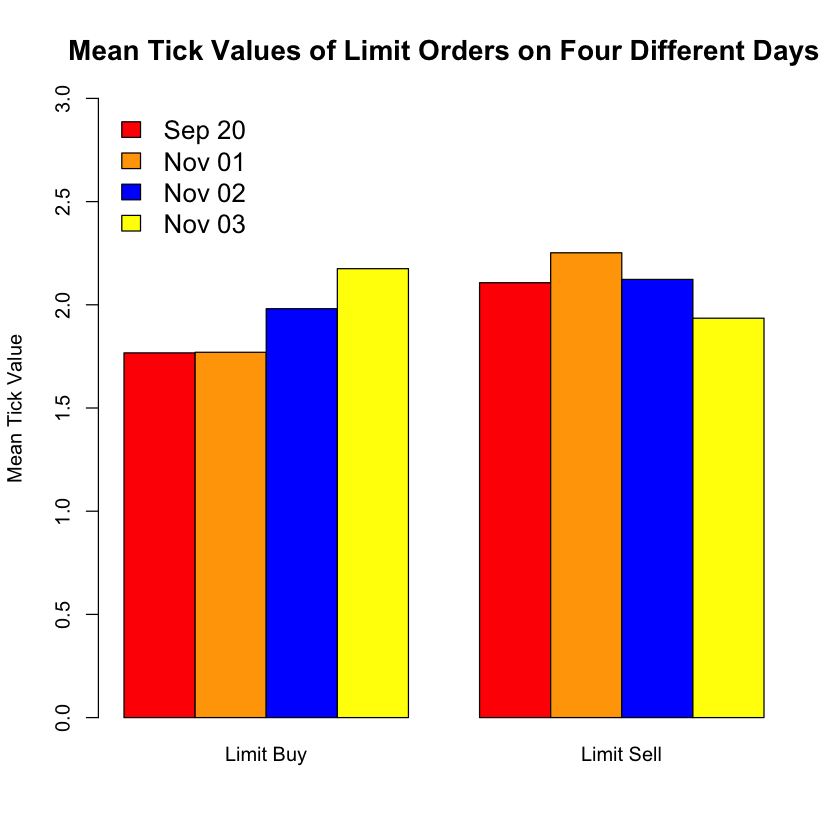

In [52]:
data <- structure(list(W= c(1.767, 1.770, 1.981, 2.175), X = c(2.107, 2.252, 2.123, 1.935)), .Names = c("Limit Buy", "Limit Sell"), class = "data.frame", row.names = c(NA, -4L))

colours <- c("red", "orange", "blue", "yellow")

barplot(as.matrix(data), main="Mean Tick Values of Limit Orders on Four Different Days", 
        ylab = "Mean Tick Value", cex.main = 1.4, beside=TRUE, col=colours, ylim=c(0,3))

legend("topleft", c("Sep 20","Nov 01","Nov 02","Nov 03"), cex=1.3, bty="n", fill=colours)

## Hourly Limit Buy Orders

In [65]:
mean_sd <- c()

for (i in 5:11) {
    
    for (j in 1:4) {
        
        mean_arr <- c()
        
        for (k in 1:30) {
            count_data <- rep(1:15, daily_q[[j]][i, 2:16])
            mean_arr <- c(mean_arr, sample(count_data, length(count_data), replace = TRUE))
        }
        
        mean_sd <- c(mean_sd, mean(mean_arr), sd(mean_arr))
    }
}

mean_sd_mat = matrix(mean_sd,
                nrow=7,
                ncol=8,
                byrow = TRUE)

mean_sd_mat <- format(mean_sd_mat, digits = 4)


dimnames(mean_sd_mat) = list(
    c("10:00 - 11:00",
      "11:00 - 12:00",
      "12:00 - 13:00",
      "14:00 - 15:00",
      "15:00 - 16:00",
      "16:00 - 17:00",
      "17:00 - 18:00"),# row names
    c("Sep 20 - Mean",
     "Sep 20 - St. Dev.",
     "Nov 01 - Mean",
     "Nov 01 - St. Dev.",
     "Nov 02 - Mean",
     "Nov 02 - St. Dev.",
     "Nov 03 - Mean",
     "Nov 03 - St.Dev.")
)

mean_sd_mat

,Sep 20 - Mean,Sep 20 - St. Dev.,Nov 01 - Mean,Nov 01 - St. Dev.,Nov 02 - Mean,Nov 02 - St. Dev.,Nov 03 - Mean,Nov 03 - St.Dev.
10:00 - 11:00,2.157,2.405,2.306,2.658,1.985,2.212,2.132,2.483
11:00 - 12:00,1.575,1.398,1.429,1.028,1.812,1.955,2.395,2.075
12:00 - 13:00,1.739,1.367,1.624,1.332,1.677,1.166,2.143,2.033
14:00 - 15:00,1.620,1.538,1.980,2.344,1.875,2.081,2.340,2.394
15:00 - 16:00,1.570,1.444,1.786,2.323,2.023,1.969,2.296,2.321
16:00 - 17:00,1.572,1.157,1.740,1.612,2.229,1.959,1.733,1.675
17:00 - 18:00,1.888,1.935,1.563,1.408,2.057,1.966,2.178,1.866


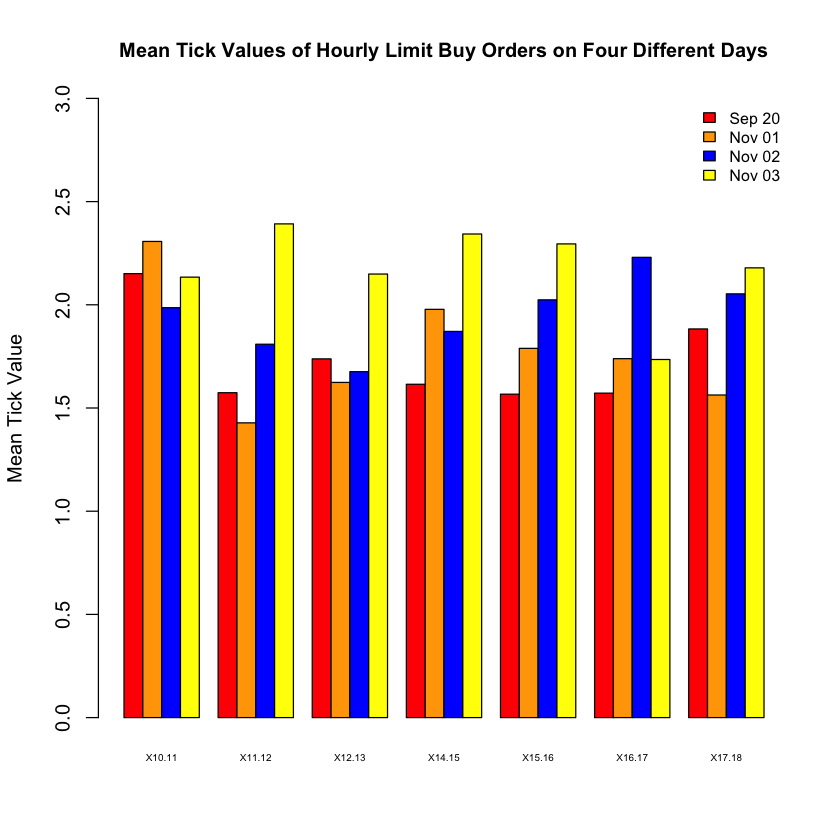

In [61]:
data <- data.frame("10 11" =  c(2.151, 2.307, 1.986, 2.134), 
                       "11 12" = c(1.574, 1.428, 1.809, 2.392),
                       "12 13" = c(1.738, 1.624, 1.676, 2.149),
                       "14 15" = c(1.615, 1.978, 1.871, 2.343),
                       "15 16" = c(1.567, 1.789, 2.024, 2.295),
                       "16 17" = c(1.572, 1.739, 2.230, 1.735),
                       "17 18" = c(1.883, 1.563, 2.053, 2.179))

colours <- c("red", "orange", "blue", "yellow")

barplot(as.matrix(data), main="Mean Tick Values of Hourly Limit Buy Orders on Four Different Days", 
        ylab = "Mean Tick Value", cex.main = 1, beside=TRUE, col=colours, ylim=c(0,3),
       cex.names=0.5)

legend("topright", c("Sep 20","Nov 01","Nov 02","Nov 03"), cex=0.8, bty="n", fill=colours)

## Hourly Limit Sell Orders

In [66]:
mean_sd <- c()

for (i in 12:18) {
    
    for (j in 1:4) {
        
        mean_arr <- c()
        
        for (k in 1:30) {
            count_data <- rep(1:15, daily_q[[j]][i, 2:16])
            mean_arr <- c(mean_arr, sample(count_data, length(count_data), replace = TRUE))
        }
        
        mean_sd <- c(mean_sd, mean(mean_arr), sd(mean_arr))
    }
}

mean_sd_mat = matrix(mean_sd,
                nrow=7,
                ncol=8,
                byrow = TRUE)

mean_sd_mat <- format(mean_sd_mat, digits = 4)


dimnames(mean_sd_mat) = list(
    c("10:00 - 11:00",
      "11:00 - 12:00",
      "12:00 - 13:00",
      "14:00 - 15:00",
      "15:00 - 16:00",
      "16:00 - 17:00",
      "17:00 - 18:00"),# row names
    c("Sep 20 - Mean",
     "Sep 20 - St. Dev.",
     "Nov 01 - Mean",
     "Nov 01 - St. Dev.",
     "Nov 02 - Mean",
     "Nov 02 - St. Dev.",
     "Nov 03 - Mean",
     "Nov 03 - St.Dev.")
)

mean_sd_mat

,Sep 20 - Mean,Sep 20 - St. Dev.,Nov 01 - Mean,Nov 01 - St. Dev.,Nov 02 - Mean,Nov 02 - St. Dev.,Nov 03 - Mean,Nov 03 - St.Dev.
10:00 - 11:00,2.469,2.688,2.655,2.943,2.639,2.463,2.136,2.167
11:00 - 12:00,2.029,2.240,2.501,2.745,2.075,1.831,2.218,2.482
12:00 - 13:00,2.378,1.871,2.425,2.552,1.891,1.671,1.583,1.339
14:00 - 15:00,2.153,2.222,2.754,3.004,1.723,1.306,1.870,1.649
15:00 - 16:00,2.418,2.219,1.579,1.495,2.467,2.330,1.906,1.602
16:00 - 17:00,2.135,1.978,1.995,1.785,1.789,1.416,1.776,1.703
17:00 - 18:00,1.464,1.004,2.157,1.982,1.906,1.839,2.042,1.969


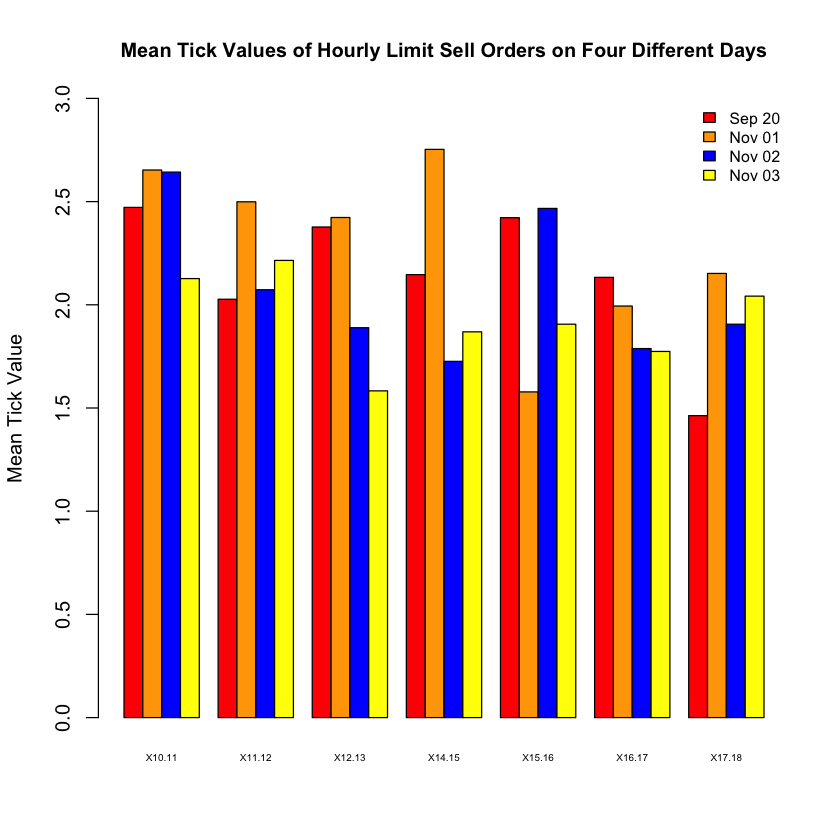

In [60]:
data <- data.frame("10 11" =  c(2.472, 2.653, 2.643, 2.127), 
                       "11 12" = c(2.027, 2.499, 2.073, 2.215),
                       "12 13" = c(2.377, 2.423, 1.889, 1.583),
                       "14 15" = c(2.146, 2.753, 1.726, 1.869),
                       "15 16" = c(2.422, 1.578, 2.467, 1.906),
                       "16 17" = c(2.133, 1.994, 1.788, 1.774),
                       "17 18" = c(1.463, 2.152, 1.906, 2.042))

colours <- c("red", "orange", "blue", "yellow")

barplot(as.matrix(data), main="Mean Tick Values of Hourly Limit Sell Orders on Four Different Days", 
        ylab = "Mean Tick Value", cex.main = 1, beside=TRUE, col=colours, ylim=c(0,3),
       cex.names=0.5)

legend("topright", c("Sep 20","Nov 01","Nov 02","Nov 03"), cex=0.8, bty="n", fill=colours)

## Hourly Cancel Buy Orders

In [9]:
mean_sd <- c()

for (i in 19:25) {
    
    for (j in 1:4) {
        
        mean_arr <- c()
        
        for (k in 1:30) {
            count_data <- rep(1:15, daily_q[[j]][i, 2:16])
            mean_arr <- c(mean_arr, sample(count_data, length(count_data), replace = TRUE))
        }
        
        mean_sd <- c(mean_sd, mean(mean_arr), sd(mean_arr))
    }
}

mean_sd_mat = matrix(mean_sd,
                nrow=7,
                ncol=8,
                byrow = TRUE)


dimnames(mean_sd_mat) = list(
    c("10:00 - 11:00",
      "11:00 - 12:00",
      "12:00 - 13:00",
      "14:00 - 15:00",
      "15:00 - 16:00",
      "16:00 - 17:00",
      "17:00 - 18:00"),# row names
    c("Sep 20 - Mean",
     "Sep 20 - St. Dev.",
     "Nov 01 - Mean",
     "Nov 01 - St. Dev.",
     "Nov 02 - Mean",
     "Nov 02 - St. Dev.",
     "Nov 03 - Mean",
     "Nov 03 - St.Dev.")
)

mean_sd_mat

,Sep 20 - Mean,Sep 20 - St. Dev.,Nov 01 - Mean,Nov 01 - St. Dev.,Nov 02 - Mean,Nov 02 - St. Dev.,Nov 03 - Mean,Nov 03 - St.Dev.
10:00 - 11:00,2.323398,2.133326,3.403321,2.900937,3.725282,3.203192,3.042222,1.967219
11:00 - 12:00,2.278002,1.457557,2.191457,1.628437,2.203322,1.406546,2.985781,2.143861
12:00 - 13:00,1.823922,1.466889,3.611293,3.367520,2.167460,1.250565,2.424033,1.585128
14:00 - 15:00,2.246643,1.897812,2.440411,2.538894,1.921305,1.323398,2.441357,2.076629
15:00 - 16:00,2.601063,2.448884,1.790487,1.299990,2.501810,2.231170,3.865630,3.322274
16:00 - 17:00,2.787476,2.987970,2.386986,1.839272,3.096195,2.172909,2.474288,1.636899
17:00 - 18:00,2.496666,2.171761,2.665281,2.123749,2.659177,2.478663,3.353814,2.446683


## Hourly Cancel Sell Orders

In [10]:
mean_sd <- c()

for (i in 26:32) {
    
    for (j in 1:4) {
        
        mean_arr <- c()
        
        for (k in 1:30) {
            count_data <- rep(1:15, daily_q[[j]][i, 2:16])
            mean_arr <- c(mean_arr, sample(count_data, length(count_data), replace = TRUE))
        }
        
        mean_sd <- c(mean_sd, mean(mean_arr), sd(mean_arr))
    }
}

mean_sd_mat = matrix(mean_sd,
                nrow=7,
                ncol=8,
                byrow = TRUE)


dimnames(mean_sd_mat) = list(
    c("10:00 - 11:00",
      "11:00 - 12:00",
      "12:00 - 13:00",
      "14:00 - 15:00",
      "15:00 - 16:00",
      "16:00 - 17:00",
      "17:00 - 18:00"),# row names
    c("Sep 20 - Mean",
     "Sep 20 - St. Dev.",
     "Nov 01 - Mean",
     "Nov 01 - St. Dev.",
     "Nov 02 - Mean",
     "Nov 02 - St. Dev.",
     "Nov 03 - Mean",
     "Nov 03 - St.Dev.")
)

mean_sd_mat

,Sep 20 - Mean,Sep 20 - St. Dev.,Nov 01 - Mean,Nov 01 - St. Dev.,Nov 02 - Mean,Nov 02 - St. Dev.,Nov 03 - Mean,Nov 03 - St.Dev.
10:00 - 11:00,3.921337,3.289315,3.422395,2.420803,2.879936,2.095787,3.372754,2.357384
11:00 - 12:00,2.965657,2.210751,3.026836,2.711338,3.089563,2.605117,2.862690,2.606841
12:00 - 13:00,3.807182,2.348176,2.025764,1.370328,2.529873,1.883214,2.460446,2.224400
14:00 - 15:00,2.258700,1.527399,3.523700,3.284557,3.008164,2.634841,2.701541,2.090140
15:00 - 16:00,4.359075,4.408068,3.090096,2.671122,2.755328,2.208873,2.742876,1.908144
16:00 - 17:00,2.906458,2.054742,4.362004,3.987130,2.945406,2.273625,2.607286,2.344643
17:00 - 18:00,3.691454,3.788221,2.576292,2.423563,2.677355,2.066557,2.286858,1.695544
